In [209]:
import pandas as pd
import numpy as np
import torch
import torchvision
import torchvision.transforms as transforms
from sklearn import datasets, linear_model
from sklearn.metrics import accuracy_score, plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt

In [24]:
train_data = pd.read_csv("../data/COVID_Data/Breathing_TRAIN.csv")
test_data = pd.read_csv("../data/COVID_Data/Breathing_TEST.csv")

In [126]:
X_train = train_data.iloc[:,1:]
y_train = train_data.iloc[:,0]
X_test = test_data.iloc[:,1:]
y_test = test_data.iloc[:,0]

scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [127]:
mlp = MLPClassifier(hidden_layer_sizes=(13,13,13),max_iter=500)
mlp.fit(X_train_scaled,y_train)
predictions = mlp.predict(X_test_scaled)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[1981    2    2    0    4   11]
 [   2 1997    1    0    0    0]
 [   3    1 1974   21    0    0]
 [   0    0   18 1982    0    0]
 [   0    0    0    0 1971   29]
 [   6    0    0    0  168 1826]]
              precision    recall  f1-score   support

           1       0.99      0.99      0.99      2000
           2       1.00      1.00      1.00      2000
           3       0.99      0.99      0.99      1999
           4       0.99      0.99      0.99      2000
           5       0.92      0.99      0.95      2000
           6       0.98      0.91      0.94      2000

    accuracy                           0.98     11999
   macro avg       0.98      0.98      0.98     11999
weighted avg       0.98      0.98      0.98     11999



In [219]:
def test_model_flow(X_test, y_test):
    
        X_test = scaler.transform(X_test)

        predictions = mlp.predict(X_test)
        print(confusion_matrix(y_test,predictions))
        print(classification_report(y_test,predictions))
        
        fig = plot_confusion_matrix(mlp, X_test, y_test,
                                 display_labels=["1","2","3"],
                                 cmap=plt.cm.Blues,
                                 normalize="true")
        plt.show()

In [220]:
data_dir = "../data/"
file_list = [(data_dir + "20200318-01.csv", 1),
            (data_dir + "20200318-normal-ragnhild.csv", 1),
            (data_dir + "20200318-slow-ragnhild.csv", 2),
            (data_dir + "20200318-fast-ragnhild.csv", 3)]

X_test_flow = np.empty(shape=(1,600))
y_test_flow = np.array([])

for file, label in file_list:
    data = pd.read_csv(
            file, 
            header=None
    )
    data.isnull().values.any()
    print(f"Data shape: {data.shape}")
    
    for i in range(data.shape[0] // 600):
        test_data = data.iloc[i*600:(i+1)*600,:].transpose()
        test_data = np.array(test_data.iloc[2,:],)
        test_data = test_data.reshape(-1, 1).transpose()
        y_test_flow = np.append(y_test_flow, np.array([label,]))
        X_test_flow = np.append(X_test_flow, test_data, axis=0)
        print(X_test_flow.shape)
        
X_test_flow = X_test_flow[1:,:]
print(X_test_flow.shape)
y_test_flow.shape

Data shape: (896, 4)
(2, 600)
Data shape: (3318, 4)
(3, 600)
(4, 600)
(5, 600)
(6, 600)
(7, 600)
Data shape: (994, 4)
(8, 600)
Data shape: (1071, 4)
(9, 600)
(8, 600)


(8,)

[[2 0 4]
 [1 0 0]
 [0 0 1]]
              precision    recall  f1-score   support

         1.0       0.67      0.33      0.44         6
         2.0       0.00      0.00      0.00         1
         3.0       0.20      1.00      0.33         1

    accuracy                           0.38         8
   macro avg       0.29      0.44      0.26         8
weighted avg       0.53      0.38      0.38         8



/Users/erikjohanneshusom/Library/Python/3.7/lib/python/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


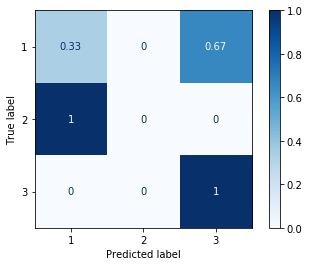

In [221]:
test_model_flow(X_test_flow, y_test_flow)